                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  605.609985  609.989990  590.559998  597.369995   
2022-01-04 00:00:00-05:00  599.909973  600.409973  581.599976  591.150024   
2022-01-05 00:00:00-05:00  592.000000  592.840027  566.880005  567.520020   
2022-01-06 00:00:00-05:00  554.340027  563.359985  542.010010  553.289978   
2022-01-07 00:00:00-05:00  549.460022  553.429993  538.219971  541.059998   
...                               ...         ...         ...         ...   
2024-03-22 00:00:00-04:00  624.159973  629.049988  621.000000  628.010010   
2024-03-25 00:00:00-04:00  627.900024  630.460022  623.159973  627.460022   
2024-03-26 00:00:00-04:00  625.200012  634.390015  619.179993  629.239990   
2024-03-27 00:00:00-04:00  629.010010  631.349976  610.729980  613.530029   
2024-03-28 00:00:00-04:00  614.989990  615.000000  601.590027  607.330017   

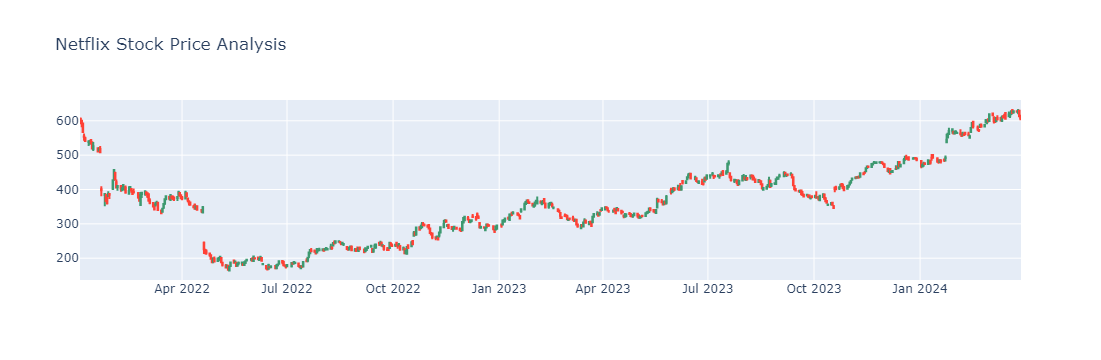

Close           1.000000
High            0.999116
Low             0.999013
Open            0.997826
Volume         -0.318737
Dividends            NaN
Stock Splits         NaN
Name: Close, dtype: float64
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________

C:\Users\l\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1/1 [==============================] - 1s 640ms/step


array([[429.12628]], dtype=float32)

In [26]:
# IMPORT THE LIBRARY
import yfinance as yf
from datetime import datetime

# CREATE TICKER INSTANCE FOR Netflix
nflx = yf.Ticker("NFLX")

# GET TODAY'S DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
end_date = datetime.now().strftime('%Y-%m-%d')
nflx_hist = nflx.history(start='2022-01-01', end=end_date)
print(nflx_hist)

import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(x=nflx_hist.index,
                                        open=nflx_hist['Open'],
                                        high=nflx_hist['High'],
                                        low=nflx_hist['Low'],
                                        close=nflx_hist['Close'])])

figure.update_layout(title="Netflix Stock Price Analysis",
                     xaxis_rangeslider_visible=False)

figure.show()

correlation = nflx_hist.corr()
print(correlation["Close"].sort_values(ascending=False))

x = nflx_hist[["Open", "High", "Low", "Volume"]]
y = nflx_hist["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Compile the model with optimizer and loss
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model with callbacks
history = model.fit(xtrain, ytrain, batch_size=1, epochs=30, validation_data=(xtest, ytest), callbacks=early_stopping)

# Save the trained model using Keras
model.save("task3netflix.h5")

# Load the trained model using Keras
from keras.models import load_model
model = load_model("task3netflix.h5")

# Save the trained model using joblib
import joblib
joblib.dump(model, "task3netflix.pkl")

# Load the trained model using joblib
model = joblib.load("task3netflix.pkl")

import numpy as np

# Features: [Open, High, Low, Adj Close, Volume]
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)
